# Proyecto intertecnicatura


## integrantes:

In [1]:
# inmportar pandas 
import pandas as pd
#importar repositorio

df = pd.read_csv('dataset_sensores.csv')

display(df.head(10))


,Fecha y hora,ID sensor,ID silo,Ubicación,Temperatura (°C),Humedad (%),CO2 (%)
0,2025-06-01 00:00:00,1,Silo 1,superior,13.494586,8.189056,3.164652
1,2025-06-01 00:00:00,2,Silo 1,medio,11.210830,8.508008,2.728765
2,2025-06-01 00:00:00,3,Silo 1,inferior,14.311821,8.993510,2.550330
3,2025-06-01 00:00:00,4,Silo 2,superior,14.289996,10.565392,3.738029
4,2025-06-01 00:00:00,5,Silo 2,medio,14.420994,9.908821,3.247908
5,2025-06-01 00:00:00,6,Silo 2,inferior,13.969569,8.353516,3.983539
6,2025-06-01 00:00:00,7,Silo 3,superior,14.928864,9.829876,2.511818
7,2025-06-01 00:00:00,8,Silo 3,medio,13.820210,11.210931,3.916386
8,2025-06-01 00:00:00,9,Silo 3,inferior,11.495531,9.540807,2.519978
9,2025-06-01 12:00:00,1,Silo 1,superior,10.789627,9.241363,3.890861


## Proceso ETL
# ⚙️ Proceso ETL – Limpieza de Datos de Sensores

El proceso ETL (Extract, Transform, Load) aplicado sobre el dataset de sensores de silos se desarrolló en tres etapas principales:

---

## 🧩 1. Extracción

Se obtuvo el archivo **`dataset_sensores.csv`**, que contiene las mediciones de temperatura, humedad y CO₂ de los sensores instalados en los silos.  
El archivo fue cargado en un DataFrame de **Pandas** para su procesamiento:

python
df = pd.read_csv("dataset_sensores.csv")

---

## 🧪 2. Transformación

En esta etapa se limpian y reestructuran los datos para facilitar su análisis posterior.

Conversión de fecha y hora:
La columna Fecha y hora se convierte al tipo datetime.
Luego se divide en dos columnas:

fecha → contiene solo el día, mes y año

hora → contiene solo la hora exacta de la medición



In [2]:
import pandas as pd

# 1) Copia y parseo del datetime
df = df.copy()
df['Fecha y hora'] = pd.to_datetime(df['Fecha y hora'], errors='coerce', dayfirst=True)

# 2) Derivar fecha y hora DESDE 'Fecha y hora'
df['fecha'] = df['Fecha y hora'].dt.date
df['hora']  = df['Fecha y hora'].dt.time

# (Opcional) quitar filas con NaT si hubiera
df = df.dropna(subset=['Fecha y hora'])

# 3) Eliminar la columna original de datetime (ya tenemos fecha/hora separadas)
df = df.drop(columns=['Fecha y hora'])

# 4) Renombrar otras columnas
df_nuevo = df.rename(columns={
    'ID sensor': 'id_sensor',
    'ID silo': 'id_silo',
    'Ubicación': 'ubicacion',
    'Temperatura (°C)': 'temp',
    'Humedad (%)': 'humedad',
    'CO2 (%)': 'co2'
})

# 5) Ordenar por fecha y luego por hora (estable) y seleccionar columnas
cols = ['fecha', 'hora', 'id_sensor', 'id_silo', 'ubicacion', 'temp', 'humedad', 'co2']
df_ordenado = (
    df_nuevo
    .sort_values(['fecha', 'hora'], kind='mergesort')
    .reset_index(drop=True)
)[cols]

display(df_ordenado.head())

,fecha,hora,id_sensor,id_silo,ubicacion,temp,humedad,co2
0,2025-01-06,00:00:00,1,Silo 1,superior,13.494586,8.189056,3.164652
1,2025-01-06,00:00:00,2,Silo 1,medio,11.210830,8.508008,2.728765
2,2025-01-06,00:00:00,3,Silo 1,inferior,14.311821,8.993510,2.550330
3,2025-01-06,00:00:00,4,Silo 2,superior,14.289996,10.565392,3.738029
4,2025-01-06,00:00:00,5,Silo 2,medio,14.420994,9.908821,3.247908


# 🧱 División del Dataset por Silo

En esta etapa del **ETL (Transformación)** separamos el dataset en **tres DataFrames** independientes —uno por cada silo— para facilitar el análisis específico por ubicación.

## 🎯 Objetivo
- Generar `silo_1_df`, `silo_2_df` y `silo_3_df` filtrando por la columna estandarizada `id_silo`.
- Mantener copias independientes (`.copy()`) para evitar *SettingWithCopyWarning*.


In [4]:
# 1. DataFrame para Silo 1
# Filtra todas las filas donde 'id_silo' sea exactamente 'Silo 1'
silo_1_df = df_nuevo[df_nuevo['id_silo'] == 'Silo 1'].copy()

# 2. DataFrame para Silo 2
# Filtra todas las filas donde 'id_silo' sea exactamente 'Silo 2'
silo_2_df = df_nuevo[df_nuevo['id_silo'] == 'Silo 2'].copy()

# 3. DataFrame para Silo 3
# Filtra todas las filas donde 'id_silo' sea exactamente 'Silo 3'
silo_3_df = df_nuevo[df_nuevo['id_silo'] == 'Silo 3'].copy()


### Silo 1

In [5]:
silo_1_df.head(10)

,id_sensor,id_silo,ubicacion,temp,humedad,co2,fecha,hora
0,1,Silo 1,superior,13.494586,8.189056,3.164652,2025-01-06,00:00:00
1,2,Silo 1,medio,11.210830,8.508008,2.728765,2025-01-06,00:00:00
2,3,Silo 1,inferior,14.311821,8.993510,2.550330,2025-01-06,00:00:00
9,1,Silo 1,superior,10.789627,9.241363,3.890861,2025-01-06,12:00:00
10,2,Silo 1,medio,10.524417,10.411437,2.766441,2025-01-06,12:00:00
11,3,Silo 1,inferior,11.140384,8.040061,2.641212,2025-01-06,12:00:00
18,1,Silo 1,superior,5.092145,NaN,NaN,2025-02-06,00:00:00
19,2,Silo 1,medio,NaN,NaN,3.892629,2025-02-06,00:00:00
20,3,Silo 1,inferior,NaN,NaN,NaN,2025-02-06,00:00:00
27,1,Silo 1,superior,22.514616,NaN,2.603155,2025-02-06,12:00:00


### Silo 2

In [6]:
silo_2_df.head(10)

,id_sensor,id_silo,ubicacion,temp,humedad,co2,fecha,hora
3,4,Silo 2,superior,14.289996,10.565392,3.738029,2025-01-06,00:00:00
4,5,Silo 2,medio,14.420994,9.908821,3.247908,2025-01-06,00:00:00
5,6,Silo 2,inferior,13.969569,8.353516,3.983539,2025-01-06,00:00:00
12,4,Silo 2,superior,14.311361,9.819459,3.470130,2025-01-06,12:00:00
13,5,Silo 2,medio,12.529130,11.249600,2.656234,2025-01-06,12:00:00
14,6,Silo 2,inferior,11.487600,11.481282,3.774920,2025-01-06,12:00:00
21,4,Silo 2,superior,14.873510,9.573136,2.810194,2025-02-06,00:00:00
22,5,Silo 2,medio,11.944507,9.388873,3.655868,2025-02-06,00:00:00
23,6,Silo 2,inferior,11.505219,11.639631,3.870789,2025-02-06,00:00:00
30,4,Silo 2,superior,12.519638,9.909959,3.203854,2025-02-06,12:00:00


### Silo 3


In [7]:
silo_3_df.head(10)

,id_sensor,id_silo,ubicacion,temp,humedad,co2,fecha,hora
6,7,Silo 3,superior,14.928864,9.829876,2.511818,2025-01-06,00:00:00
7,8,Silo 3,medio,13.820210,11.210931,3.916386,2025-01-06,00:00:00
8,9,Silo 3,inferior,11.495531,9.540807,2.519978,2025-01-06,00:00:00
15,7,Silo 3,superior,11.424231,10.361593,3.774518,2025-01-06,12:00:00
16,8,Silo 3,medio,14.618179,9.953989,3.137908,2025-01-06,12:00:00
17,9,Silo 3,inferior,11.930486,11.557953,3.548613,2025-01-06,12:00:00
24,7,Silo 3,superior,11.764888,11.308370,3.986062,2025-02-06,00:00:00
25,8,Silo 3,medio,10.815238,11.287400,2.786697,2025-02-06,00:00:00
26,9,Silo 3,inferior,14.098330,9.268005,2.892456,2025-02-06,00:00:00
33,7,Silo 3,superior,12.572121,9.923640,2.511319,2025-02-06,12:00:00


## Creamos un Botón para exportar el dataset

In [9]:
import ipywidgets as widgets
from IPython.display import display

def export_silo(df, nombre):
    archivo = f"{nombre}.csv"
    df.to_csv(archivo, index=False)
    print(f"✅ Archivo guardado: {archivo}")

# Botones
btn_silo1 = widgets.Button(description="💾 Exportar Silo 1")
btn_silo2 = widgets.Button(description="💾 Exportar Silo 2")
btn_silo3 = widgets.Button(description="💾 Exportar Silo 3")

# Eventos
btn_silo1.on_click(lambda x: export_silo(silo_1_df, "silo_1"))
btn_silo2.on_click(lambda x: export_silo(silo_2_df, "silo_2"))
btn_silo3.on_click(lambda x: export_silo(silo_3_df, "silo_3"))

# Mostrar botones
display(btn_silo1, btn_silo2, btn_silo3)




Button(description='💾 Exportar Silo 1', style=ButtonStyle())

Button(description='💾 Exportar Silo 2', style=ButtonStyle())

Button(description='💾 Exportar Silo 3', style=ButtonStyle())

# 📊 Análisis descriptivo por silo y mes

En esta etapa se analizan los valores **mínimos**, **máximos**, **promedios** y **medianos** de cada variable medida por los sensores.

El análisis se realiza **por silo y por mes**, permitiendo observar la evolución y el rango de variación de temperatura, humedad y CO₂ a lo largo del tiempo.


In [10]:
import pandas as pd

# Asegurar que 'fecha' es datetime
df_nuevo['fecha'] = pd.to_datetime(df_nuevo['fecha'], errors='coerce')

# Agregar columna con el mes (nombre o número)
df_nuevo['mes'] = df_nuevo['fecha'].dt.month_name()   # o .dt.month para número

# Agrupar por silo y mes, y calcular estadísticas
resumen = (
    df_nuevo
    .groupby(['id_silo', 'mes'])
    .agg({
        'temp':   ['min', 'max', 'mean', 'median'],
        'humedad':['min', 'max', 'mean', 'median'],
        'co2':    ['min', 'max', 'mean', 'median']
    })
    .round(2)
)

# Ordenar columnas y mejorar legibilidad
resumen.columns = ['_'.join(col).strip() for col in resumen.columns.values]
resumen = resumen.reset_index()

display(resumen.head())


,id_silo,mes,temp_min,temp_max,temp_mean,temp_median,humedad_min,humedad_max,humedad_mean,humedad_median,co2_min,co2_max,co2_mean,co2_median
0,Silo 1,April,7.50,24.43,17.29,17.99,5.12,18.53,12.10,13.12,1.66,5.54,3.21,3.07
1,Silo 1,August,8.30,24.78,15.41,15.83,5.60,19.22,14.01,13.42,1.72,5.80,3.94,3.51
2,Silo 1,December,6.91,24.78,17.30,17.37,5.10,19.22,12.63,11.41,1.40,5.91,3.39,3.19
3,Silo 1,February,5.09,22.51,15.48,14.84,6.48,19.82,13.47,13.60,1.27,5.23,3.04,2.91
4,Silo 1,January,10.17,14.98,12.76,13.30,8.04,11.72,9.40,9.13,2.53,3.89,3.10,3.11


---

## 📈 Visualización en tablas por silo

Se pueden generar tablas separadas para cada silo, con los meses en el eje X y las métricas en el eje Y, de modo que se observe claramente la evolución mensual de cada variable.


In [11]:
# Tabla por cada silo
for silo in resumen['id_silo'].unique():
    print(f"\n### 📦 {silo}")
    display(resumen[resumen['id_silo'] == silo].set_index('mes'))



### 📦 Silo 1


,id_silo,temp_min,temp_max,temp_mean,temp_median,humedad_min,humedad_max,humedad_mean,humedad_median,co2_min,co2_max,co2_mean,co2_median
mes,,,,,,,,,,,,,
April,Silo 1,7.50,24.43,17.29,17.99,5.12,18.53,12.10,13.12,1.66,5.54,3.21,3.07
August,Silo 1,8.30,24.78,15.41,15.83,5.60,19.22,14.01,13.42,1.72,5.80,3.94,3.51
December,Silo 1,6.91,24.78,17.30,17.37,5.10,19.22,12.63,11.41,1.40,5.91,3.39,3.19
February,Silo 1,5.09,22.51,15.48,14.84,6.48,19.82,13.47,13.60,1.27,5.23,3.04,2.91
January,Silo 1,10.17,14.98,12.76,13.30,8.04,11.72,9.40,9.13,2.53,3.89,3.10,3.11
July,Silo 1,10.16,14.89,11.96,11.75,8.04,11.42,9.82,9.63,2.52,3.97,3.33,3.33
June,Silo 1,6.84,24.71,17.44,17.35,7.28,19.66,14.46,14.53,1.01,5.37,3.15,2.81
March,Silo 1,10.04,14.89,12.08,11.81,8.27,11.68,9.79,9.67,2.55,3.97,3.25,3.24
May,Silo 1,10.27,14.94,12.17,12.21,8.19,11.97,10.27,10.37,2.51,3.99,3.16,2.91



### 📦 Silo 2


,id_silo,temp_min,temp_max,temp_mean,temp_median,humedad_min,humedad_max,humedad_mean,humedad_median,co2_min,co2_max,co2_mean,co2_median
mes,,,,,,,,,,,,,
April,Silo 2,10.17,14.97,12.48,12.37,8.05,11.98,9.71,9.26,2.51,4.00,3.27,3.31
August,Silo 2,10.34,15.00,12.63,12.64,8.12,11.82,9.85,9.67,2.54,3.96,3.29,3.37
December,Silo 2,10.03,14.90,12.56,12.44,8.28,11.87,10.22,10.28,2.56,3.93,3.15,3.08
February,Silo 2,10.55,14.99,12.66,12.69,8.25,11.94,10.42,10.48,2.51,3.99,3.18,3.20
January,Silo 2,10.09,14.88,13.05,13.42,8.35,11.82,10.10,10.31,2.52,3.99,3.31,3.27
July,Silo 2,10.05,14.97,12.84,13.37,8.16,11.90,10.01,9.79,2.51,3.99,3.32,3.32
June,Silo 2,10.32,14.77,12.63,13.04,8.07,11.93,9.63,9.46,2.50,3.94,3.21,3.25
March,Silo 2,10.05,14.95,12.85,13.36,8.02,11.02,9.80,9.92,2.50,4.00,3.41,3.48
May,Silo 2,10.26,14.86,12.82,13.27,8.05,11.97,10.05,9.82,2.50,4.00,3.13,3.09



### 📦 Silo 3


,id_silo,temp_min,temp_max,temp_mean,temp_median,humedad_min,humedad_max,humedad_mean,humedad_median,co2_min,co2_max,co2_mean,co2_median
mes,,,,,,,,,,,,,
April,Silo 3,10.02,14.77,12.71,12.84,8.15,11.81,10.16,10.46,2.52,3.84,3.18,3.17
August,Silo 3,10.11,14.61,12.27,12.38,8.07,11.76,9.90,9.77,2.52,3.94,3.33,3.46
December,Silo 3,10.01,14.53,12.36,12.48,8.32,11.88,9.95,9.73,2.57,3.93,3.11,3.02
February,Silo 3,10.12,14.92,12.68,12.56,8.02,11.93,9.86,9.91,2.51,3.99,3.18,2.95
January,Silo 3,10.12,14.99,12.78,11.93,8.11,11.97,9.92,9.83,2.51,3.97,3.28,3.36
July,Silo 3,10.02,14.81,12.34,12.40,8.02,11.76,9.83,9.92,2.57,3.90,3.31,3.42
June,Silo 3,10.10,14.62,12.54,12.69,8.28,11.95,10.43,10.68,2.59,3.83,3.15,3.10
March,Silo 3,10.02,14.90,12.16,12.04,8.04,11.91,9.87,10.18,2.57,3.83,3.14,3.11
May,Silo 3,10.23,14.93,12.35,12.32,8.07,11.83,9.75,9.68,2.61,3.93,3.33,3.34


# 📈 Visualización mensual por silo

A continuación se grafican las variables **Temperatura**, **Humedad** y **CO₂** promedio por mes para cada silo.

El eje X representa los **meses** y el eje Y la **magnitud promedio** de cada variable.  
Esto permite identificar tendencias estacionales y variaciones a lo largo del año.


C:\Users\melchiorre_m\AppData\Local\Temp\ipykernel_16892\1322740774.py:25: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\melchiorre_m\AppData\Local\Temp\ipykernel_16892\1322740774.py:25: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\melchiorre_m\AppData\Local\Temp\ipykernel_16892\1322740774.py:25: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


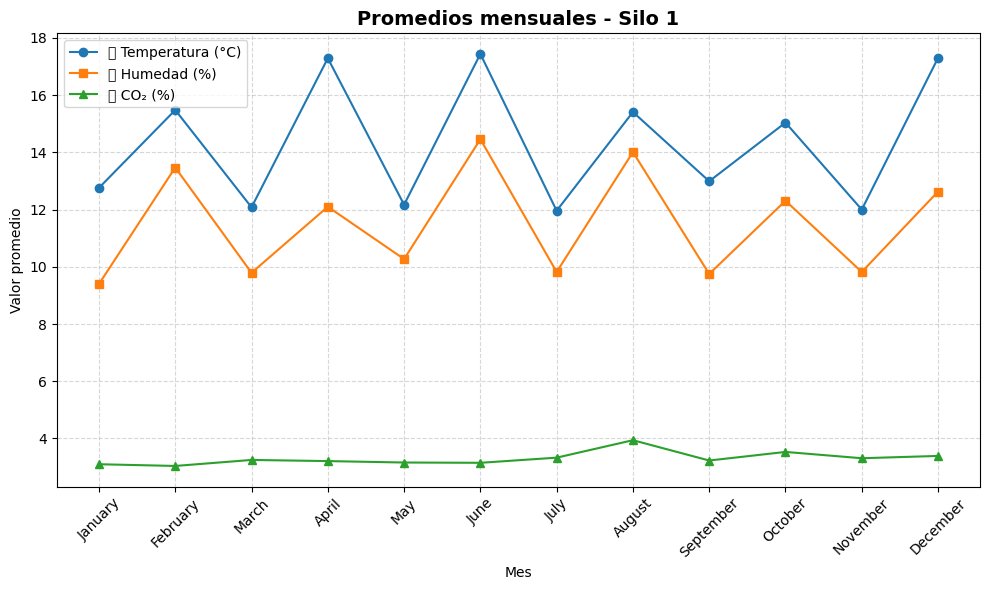

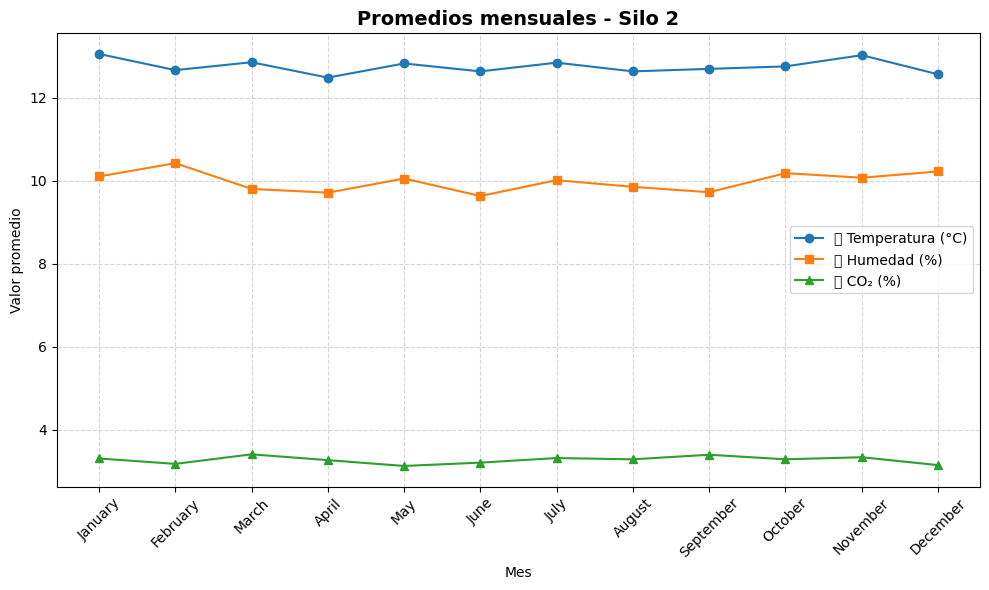

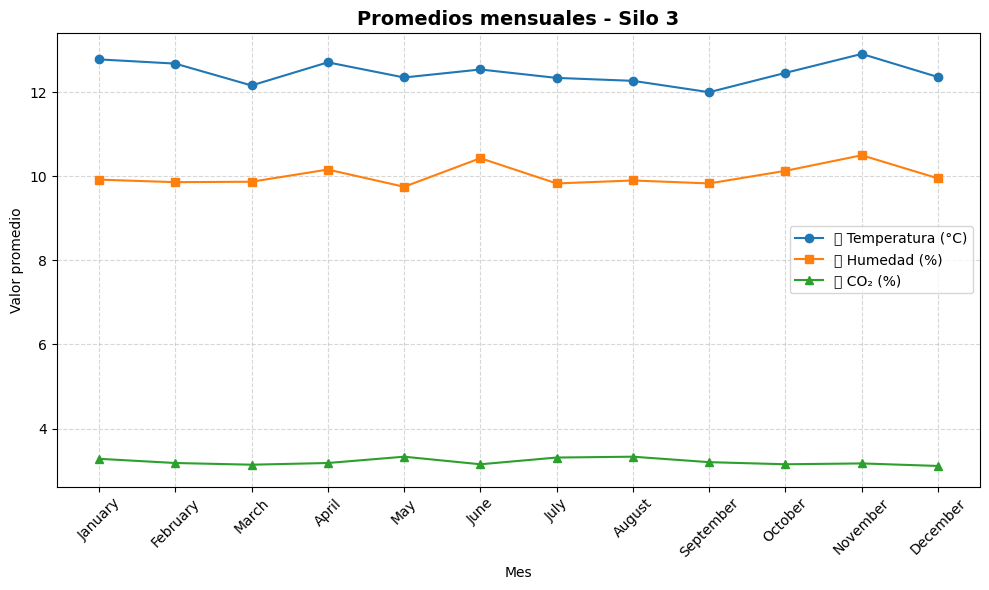

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar orden cronológico de los meses
orden_meses = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

# Graficar por silo
for silo in resumen['id_silo'].unique():
    data = resumen[resumen['id_silo'] == silo].copy()
    data['mes'] = pd.Categorical(data['mes'], categories=orden_meses, ordered=True)
    data = data.sort_values('mes')

    plt.figure(figsize=(10,6))
    plt.plot(data['mes'], data['temp_mean'], marker='o', label='🌡️ Temperatura (°C)')
    plt.plot(data['mes'], data['humedad_mean'], marker='s', label='💧 Humedad (%)')
    plt.plot(data['mes'], data['co2_mean'], marker='^', label='🟢 CO₂ (%)')

    plt.title(f'Promedios mensuales - {silo}', fontsize=14, weight='bold')
    plt.xlabel('Mes')
    plt.ylabel('Valor promedio')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
